### Cleaning of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
colors = ['#1565c0', '#862C92', '#00BCD4', '#2196f3','#64b5f6', '#bbdefb', '#004173']
sns.set_palette(colors)

In [3]:
bank_df = pd.read_csv('bank_marketing.csv')
bank_df.head()

,client_id,age,job,marital,education,credit_default,mortgage,month,day,contact_duration,number_contacts,previous_campaign_contacts,previous_outcome,cons_price_idx,euribor_three_months,campaign_outcome
0,0,56,housemaid,married,basic.4y,no,no,may,13,261,1,0,nonexistent,93.994,4.857,no
1,1,57,services,married,high.school,unknown,no,may,19,149,1,0,nonexistent,93.994,4.857,no
2,2,37,services,married,high.school,no,yes,may,23,226,1,0,nonexistent,93.994,4.857,no
3,3,40,admin.,married,basic.6y,no,no,may,27,151,1,0,nonexistent,93.994,4.857,no
4,4,56,services,married,high.school,no,no,may,3,307,1,0,nonexistent,93.994,4.857,no


In [4]:
bank_df.dtypes

client_id                       int64
age                             int64
job                            object
marital                        object
education                      object
credit_default                 object
mortgage                       object
month                          object
day                             int64
contact_duration                int64
number_contacts                 int64
previous_campaign_contacts      int64
previous_outcome               object
cons_price_idx                float64
euribor_three_months          float64
campaign_outcome               object
dtype: object

In [5]:
for col in ['credit_default', 'mortgage', 'previous_outcome', 'campaign_outcome']:
    print('---------------------------')
    print(bank_df[col].value_counts())

---------------------------
credit_default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
---------------------------
mortgage
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
---------------------------
previous_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64
---------------------------
campaign_outcome
no     36548
yes     4640
Name: count, dtype: int64


In [ ]:
# Replacing the columns values
columns_replace = ['credit_default','mortgage','previous_outcome','campaign_outcome']

for col in columns_replace:
    bank_df[col] = bank_df[col].astype(str)
    
replace_dict = {'yes':1, 'unknown':0,'no':0,'success':1,'failure':0,'nonexistent':0}

for col in columns_replace:
    bank_df[col] = bank_df[col].replace(replace_dict)

for col in columns_replace:
    bank_df[col] = bank_df[col].astype(int)

In [7]:
# Converting to bool values
for col in ['credit_default', 'mortgage', 'previous_outcome', 'campaign_outcome']:
    bank_df[col] = bank_df[col].astype(bool)

In [8]:
# Changing the values in job and education column
bank_df['job'] = bank_df['job'].str.replace(".", "_")

bank_df['education'] = bank_df['education'].str.replace(".", "_")
bank_df['education'] = bank_df['education'].replace("unknown", np.nan)

assert 'unknown' not in bank_df['education'].values

In [ ]:
# Replacing month column in numbers
bank_df['month'] = bank_df['month'].replace({
    'may':5, 'jul':7, 'aug':8, 'jun':6, 'nov':11, 'apr':4, 'oct':10, 'sep':9, 'mar':3, 'dec':12}).astype(int)

# Creating year column
bank_df['year'] = 2022

# Converting year, month and day column in string
bank_df['month'] = bank_df['month'].astype(str)
bank_df['year'] = bank_df['year'].astype(str)
bank_df['day'] = bank_df['day'].astype(str)

# Creating last contact date column
bank_df['last_contact_date'] = pd.to_datetime(bank_df['year'] + '-' + bank_df['month'] + '-' + bank_df['day'])

In [10]:
client_df = bank_df[['client_id','age','job','marital','education','credit_default','mortgage']]
campaign_df = bank_df[['client_id','number_contacts','contact_duration','previous_campaign_contacts',\
'previous_outcome','campaign_outcome','last_contact_date']]
economics_df = bank_df[['client_id','cons_price_idx','euribor_three_months']]

In [11]:
client = client_df.to_csv("client_df.csv", index=False)
campaign = campaign_df.to_csv("campaign_df.csv", index=False)
economics = economics_df.to_csv("economics.csv", index=False)

In [12]:
# Dataframe of client
client_df.head()

,client_id,age,job,marital,education,credit_default,mortgage
0,0,56,housemaid,married,basic_4y,False,False
1,1,57,services,married,high_school,False,False
2,2,37,services,married,high_school,False,True
3,3,40,admin_,married,basic_6y,False,False
4,4,56,services,married,high_school,False,False


In [13]:
client_df.shape

(41188, 7)

In [14]:
# Dataframe of campaign
campaign_df.head()

,client_id,number_contacts,contact_duration,previous_campaign_contacts,previous_outcome,campaign_outcome,last_contact_date
0,0,1,261,0,False,False,2022-05-13
1,1,1,149,0,False,False,2022-05-19
2,2,1,226,0,False,False,2022-05-23
3,3,1,151,0,False,False,2022-05-27
4,4,1,307,0,False,False,2022-05-03


In [15]:
campaign_df.shape

(41188, 7)

In [16]:
# Dataframe of economics
economics_df.head()

,client_id,cons_price_idx,euribor_three_months
0,0,93.994,4.857
1,1,93.994,4.857
2,2,93.994,4.857
3,3,93.994,4.857
4,4,93.994,4.857


In [17]:
economics_df.shape

(41188, 3)

### Analysis

#### 1. Customer profiles

In [18]:
# Credit default by job 
credits_defaults = client_df[client_df['credit_default'] == True]
job_credits_default = credits_defaults['job'].value_counts()
job_credits_default

job
technician    2
unemployed    1
Name: count, dtype: int64

In [19]:
# Credits awarded by job 
credits_granted = client_df[client_df['credit_default'] == False]
job_credits_granted = credits_granted['job'].value_counts()
job_credits_granted

job
admin_           10422
blue-collar       9254
technician        6741
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1013
student            875
unknown            330
Name: count, dtype: int64

In [20]:
client_df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [ ]:
# Creating a new age range column
ranges = [17, 30, 50, 70, np.inf]
group_names = ['17-30', '31-50', '51-70', '71+']

client_df.loc[:, 'age_range'] = pd.cut(client_df['age'], bins=ranges, labels=group_names, right=True, include_lowest=True)
client_df

In [22]:
# Credit default by age
age_credits_default = credits_defaults['age'].value_counts()
age_credits_default

age
48    2
31    1
Name: count, dtype: int64

In [23]:
# Credit default by age range
age_range_credits_default = client_df.loc[client_df['credit_default'] == True, 'age_range'].value_counts()
age_range_credits_default

age_range
31-50    3
17-30    0
51-70    0
71+      0
Name: count, dtype: int64

In [24]:
# Credits awarded by age
age_credits_granted = credits_granted['age'].value_counts()
age_credits_granted

age
31    1946
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

In [25]:
# Credit default by age range
age_range_credits_awarded = client_df.loc[client_df['credit_default'] == False, 'age_range'].value_counts()
age_range_credits_awarded

age_range
31-50    26622
17-30     7383
51-70     6758
71+        422
Name: count, dtype: int64

In [26]:
# Credit default by marital status
marital_credits_default = credits_defaults['marital'].value_counts()
marital_credits_default

marital
married    3
Name: count, dtype: int64

In [27]:
# Credits awarded by marital status
marital_credits_granted = credits_granted['marital'].value_counts()
marital_credits_granted

marital
married     24925
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [28]:
# Credit default by education
education_credits_default = credits_defaults['education'].value_counts()
education_credits_default

education
professional_course    2
high_school            1
Name: count, dtype: int64

In [29]:
# Credits awarded by education
education_credits_granted = credits_granted['education'].value_counts()
education_credits_granted

education
university_degree      12168
high_school             9514
basic_9y                6045
professional_course     5241
basic_4y                4176
basic_6y                2292
illiterate                18
Name: count, dtype: int64

In [30]:
# Credit default and mortage
mortgage_credits_default = credits_defaults['mortgage'].value_counts()
mortgage_credits_default

mortgage
False    2
True     1
Name: count, dtype: int64

In [31]:
# Credits awarded and mortgage
mortgage_credits_granted = credits_granted['mortgage'].value_counts()
mortgage_credits_granted

mortgage
True     21575
False    19610
Name: count, dtype: int64

In [32]:
# Job and credits
job_credit_counts = (client_df.groupby(['job','credit_default']).size().reset_index(name='count'))
job_credit_counts

,job,credit_default,count
0,admin_,False,10422
1,blue-collar,False,9254
2,entrepreneur,False,1456
3,housemaid,False,1060
4,management,False,2924
5,retired,False,1720
6,self-employed,False,1421
7,services,False,3969
8,student,False,875
9,technician,False,6741


In [33]:
# Job and credits
age_credit_counts = (client_df.groupby(['age_range','credit_default'], observed=True).size().reset_index(name='count'))
age_credit_counts

,age_range,credit_default,count
0,17-30,False,7383
1,31-50,False,26622
2,31-50,True,3
3,51-70,False,6758
4,71+,False,422


In [34]:
# Marital status and credits
marital_credits_count = (client_df.groupby(['marital','credit_default']).size().reset_index(name='count'))
marital_credits_count

,marital,credit_default,count
0,divorced,False,4612
1,married,False,24925
2,married,True,3
3,single,False,11568
4,unknown,False,80


In [35]:
# Education and credits
education_credit_count = (client_df.groupby(['education','credit_default']).size().reset_index(name='count'))
education_credit_count

,education,credit_default,count
0,basic_4y,False,4176
1,basic_6y,False,2292
2,basic_9y,False,6045
3,high_school,False,9514
4,high_school,True,1
5,illiterate,False,18
6,professional_course,False,5241
7,professional_course,True,2
8,university_degree,False,12168


In [36]:
# Mortgage and credits
mortgage_credit_count = (client_df.groupby(['mortgage','credit_default']).size().reset_index(name='count'))
mortgage_credit_count

,mortgage,credit_default,count
0,False,False,19610
1,False,True,2
2,True,False,21575
3,True,True,1


### Visualization of Profile Customers

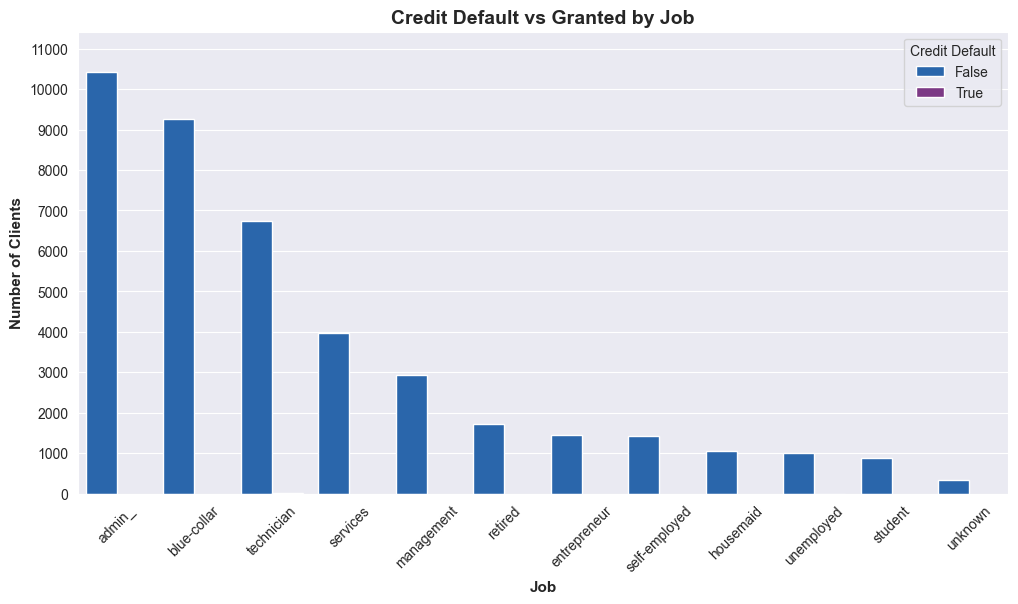

In [37]:
# Graphic job and credit
plt.figure(figsize=(12,6))
sns.barplot(data=job_credit_counts.sort_values(by='count', ascending=False), x='job', y='count', hue='credit_default')
plt.title("Credit Default vs Granted by Job", fontsize=14, weight="bold")
plt.xlabel("Job", fontsize=11, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(1000)) # step by 1000
plt.ylim(0,job_credit_counts['count'].max()+1000)
plt.legend(title="Credit Default")
plt.show()

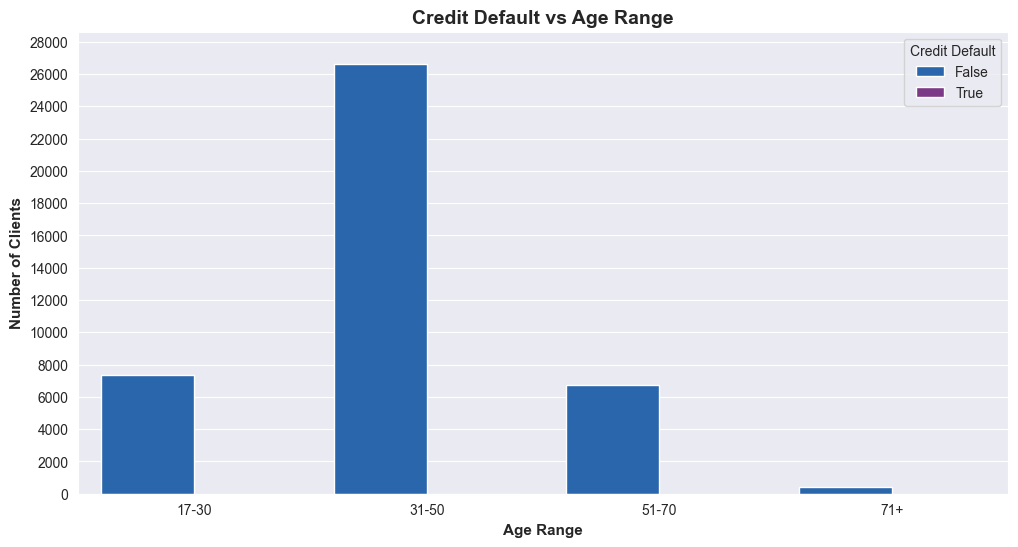

In [38]:
# Graphic age range and credit
plt.figure(figsize=(12,6))
sns.barplot(data=age_credit_counts, x='age_range', y='count', hue='credit_default')
plt.title("Credit Default vs Age Range", fontsize=14, weight="bold")
plt.xlabel("Age Range", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,age_credit_counts['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()

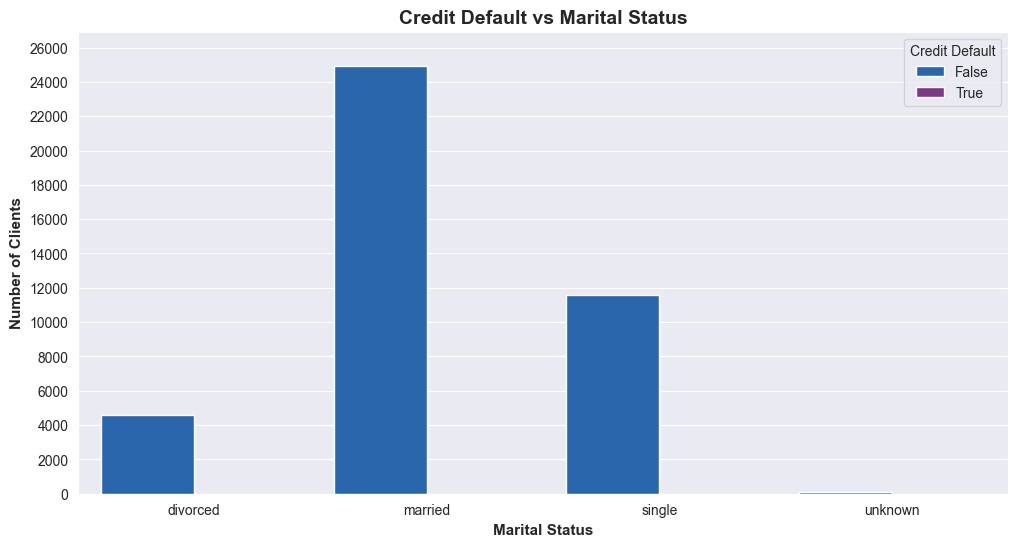

In [39]:
# Graphic marital status and credit
plt.figure(figsize=(12,6))
sns.barplot(data=marital_credits_count, x='marital', y='count', hue='credit_default')
plt.title("Credit Default vs Marital Status", fontsize=14, weight="bold")
plt.xlabel("Marital Status", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,marital_credits_count['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()

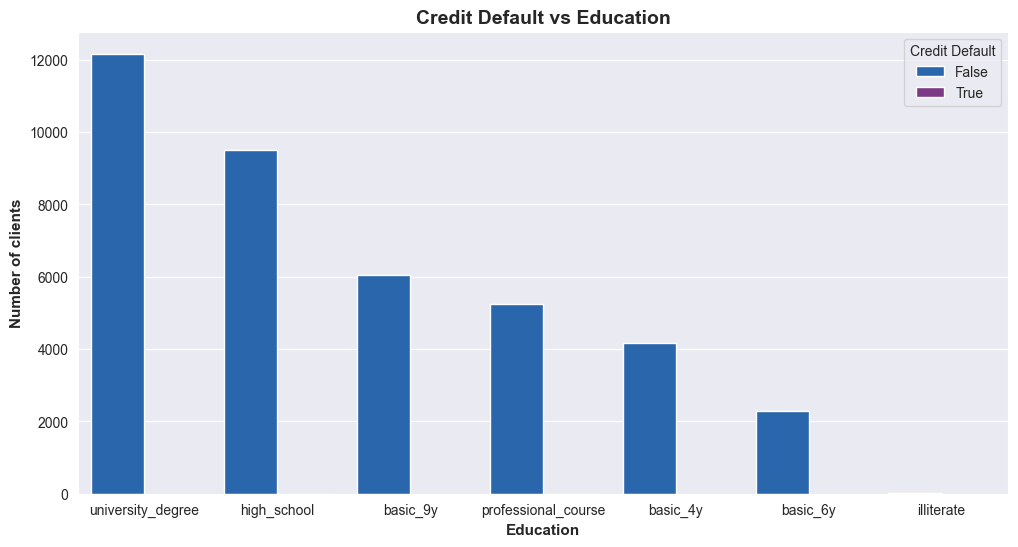

In [78]:
# Graphic education and credit
plt.figure(figsize=(12,6))
sns.barplot(data=education_credit_count.sort_values(by='count', ascending=False)\
,x='education', y='count', hue='credit_default') #Sort by count
plt.title("Credit Default vs Education", fontsize=14, weight="bold")
plt.xlabel("Education", fontsize=11, weight="bold")
plt.ylabel("Number of clients", fontsize=11, weight="bold")
plt.legend(title='Credit Default')
plt.show()

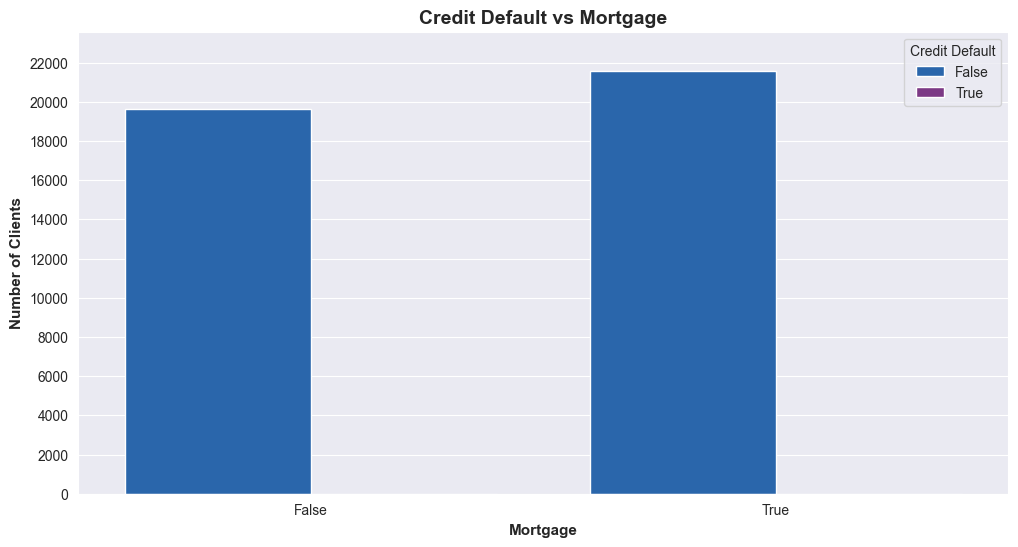

In [41]:
# Graphic mortgage and credit
plt.figure(figsize=(12,6))
sns.barplot(data=mortgage_credit_count, x='mortgage', y='count', hue='credit_default')
plt.title("Credit Default vs Mortgage", fontsize=14, weight="bold")
plt.xlabel("Mortgage", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,mortgage_credit_count['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()

### 2. Effectiveness marketing campaign 

In [42]:
campaign_df.dtypes

client_id                              int64
number_contacts                        int64
contact_duration                       int64
previous_campaign_contacts             int64
previous_outcome                        bool
campaign_outcome                        bool
last_contact_date             datetime64[ns]
dtype: object

### Current campaign

In [45]:
# Contact Duration (in minutes)
mean_contact_duration = (campaign_df['contact_duration']//60).mean().round(2)
min_contact_duration = (campaign_df['contact_duration']//60).min().round(2)
max_contact_duration = (campaign_df['contact_duration']//60).max().round(2)
print(f"Mean of current contacts: {mean_contact_duration}")
print(f"Minimum of current contacts: {min_contact_duration}")
print(f"Maximun of current contacts: {max_contact_duration}")

Mean of current contacts: 3.82
Minimum of current contacts: 0
Maximun of current contacts: 81


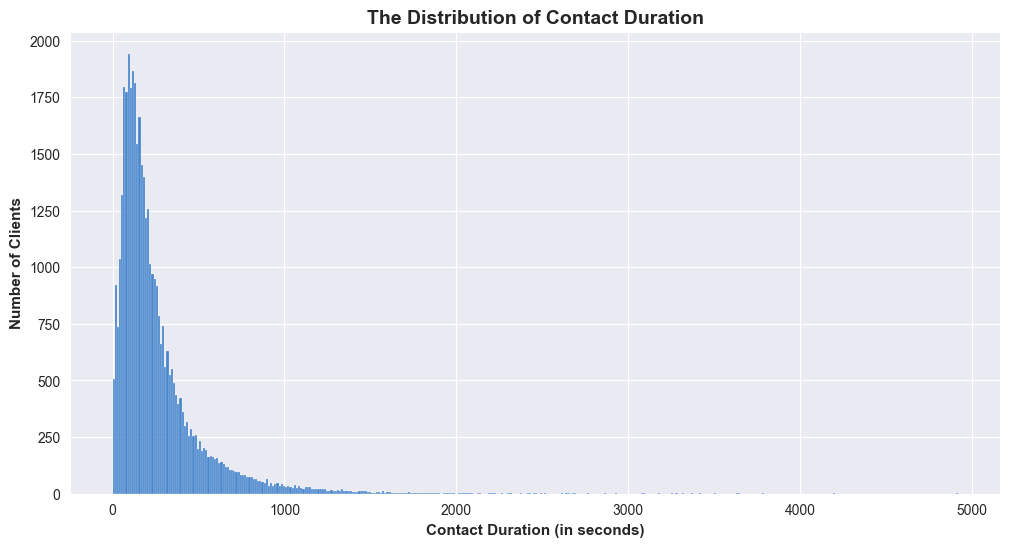

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=campaign_df, x='contact_duration')
plt.title("The Distribution of Contact Duration",fontsize=14, weight="bold")
plt.xlabel("Contact Duration (in seconds)", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
plt.show()

In [47]:
# Number of contacts
mean_number_contacts = campaign_df['number_contacts'].mean().round(2)
min_number_contacts = campaign_df['number_contacts'].min().round(2)
max_number_contacts = campaign_df['number_contacts'].max().round(2)
print(mean_number_contacts, min_number_contacts, max_number_contacts)

2.57 1 56


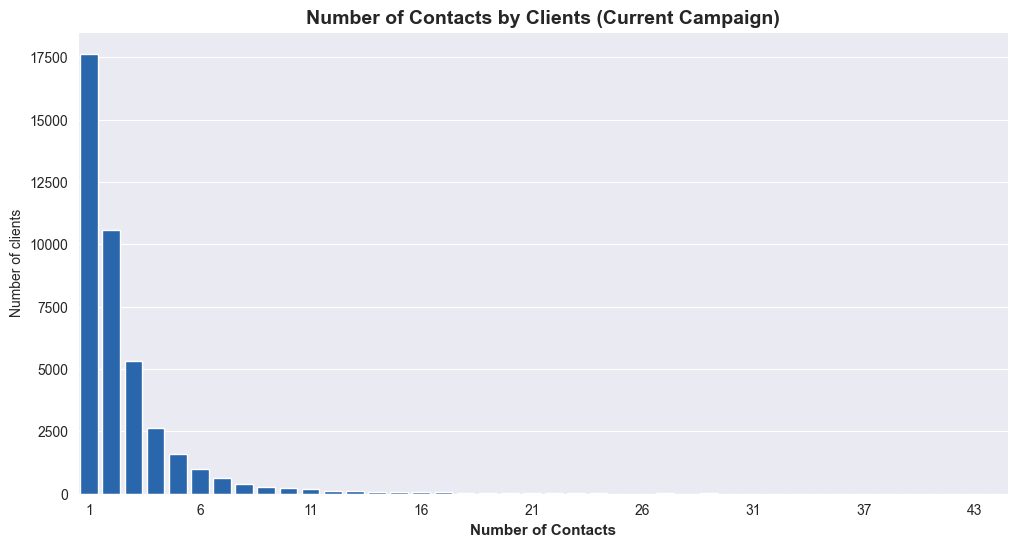

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data=campaign_df, x='number_contacts')
plt.title("Number of Contacts by Clients (Current Campaign)",fontsize=14, weight="bold")
plt.xlabel("Number of Contacts", fontsize=11, weight="bold")
plt.ylabel("Number of clients")
# Ticks integers axes X
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [49]:
# Contact duration vs campaign outcome
campaign_df = campaign_df.copy()
# New column in minutes
campaign_df['contact_duration_min'] = round(campaign_df['contact_duration']/60,2)

# Creating a new contact duration range column
ranges_duration = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
group_names_contact_duration = ['1-10', '11-20', '21-30', '31-40', '41-50','51-60','62-70','71+']

campaign_df['contact_duration_min_range'] = pd.cut(campaign_df['contact_duration_min'],
bins=ranges_duration, labels=group_names_contact_duration, right=True, include_lowest=True)

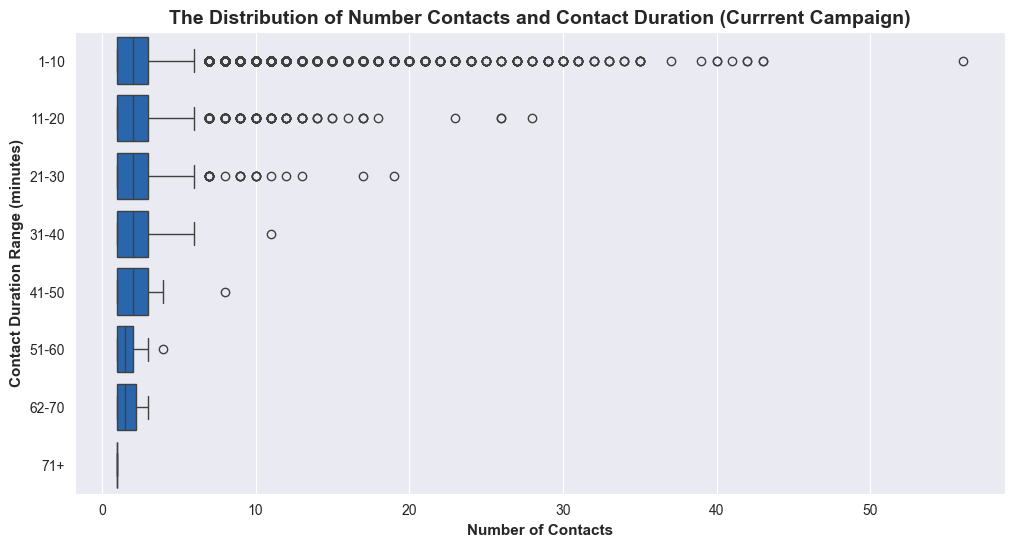

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=campaign_df, x='number_contacts', y='contact_duration_min_range')
plt.title("The Distribution of Number Contacts and Contact Duration (Currrent Campaign)", fontsize=14, weight="bold")
plt.xlabel("Number of Contacts", fontsize=11, weight="bold")
plt.ylabel("Contact Duration Range (minutes)", fontsize=11, weight="bold")
plt.show()

In [ ]:
# Number of contacts vs campaign outcome
contacts_campaign_results = (campaign_df.groupby(['number_contacts','campaign_outcome']).size().reset_index(name='count'))
contacts_campaign_results

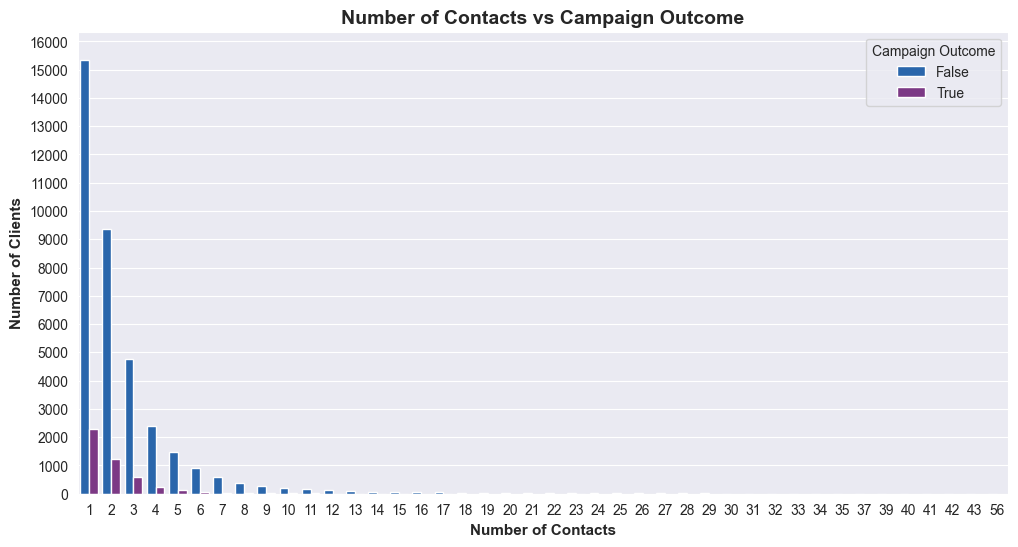

In [52]:
# Graphic numer of contacts and campaign outcome
plt.figure(figsize=(12,6))
sns.barplot(data=contacts_campaign_results, x='number_contacts', y='count', hue='campaign_outcome')
plt.title("Number of Contacts vs Campaign Outcome", fontsize=14, weight="bold")
plt.xlabel("Number of Contacts", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))
plt.ylim(0,contacts_campaign_results['count'].max()+1000)
plt.legend(title="Campaign Outcome")
plt.show()

In [53]:
# Grouping contact duration and campaign outcome
contact_duration_campaign_results = \
(campaign_df.groupby(['contact_duration_min_range','campaign_outcome'], observed=False).size().reset_index(name='count'))
contact_duration_campaign_results

,contact_duration_min_range,campaign_outcome,count
0,1-10,False,34768
1,1-10,True,2956
2,11-20,False,1588
3,11-20,True,1363
4,21-30,False,151
5,21-30,True,261
6,31-40,False,28
7,31-40,True,42
8,41-50,False,4
9,41-50,True,12


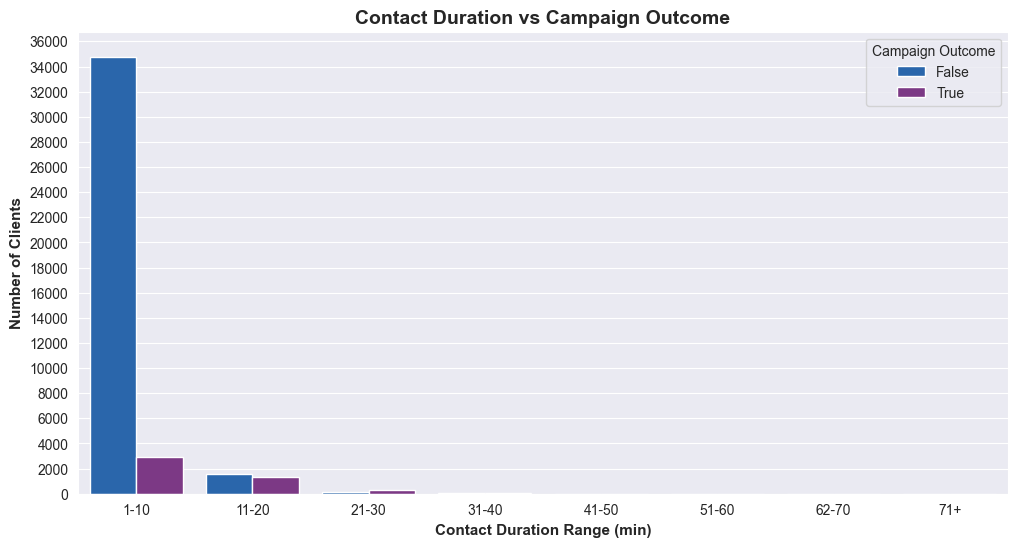

In [54]:
# Graphic contact duration and campaign outcome
plt.figure(figsize=(12,6))
sns.barplot(data=contact_duration_campaign_results, x='contact_duration_min_range', y='count', hue='campaign_outcome')
plt.title("Contact Duration vs Campaign Outcome", fontsize=14, weight="bold")
plt.xlabel("Contact Duration Range (min)", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,contact_duration_campaign_results['count'].max()+2000)
plt.legend(title="Campaign Outcome")
plt.show()

### Previous campaign

In [55]:
# Number of contacts
mean_number_prev_contacts = campaign_df['previous_campaign_contacts'].mean().round(2)
min_number_prev_contacts = campaign_df['previous_campaign_contacts'].min().round(2)
max_number_prev_contacts = campaign_df['previous_campaign_contacts'].max().round(2)
print(f"Mean of previous contacts: {mean_number_prev_contacts}")
print(f"Minimum of previous contacts: {min_number_prev_contacts}")
print(f"Maximun of previous contacts: {max_number_prev_contacts}")

Mean of previous contacts: 0.17
Minimum of previous contacts: 0
Maximun of previous contacts: 7


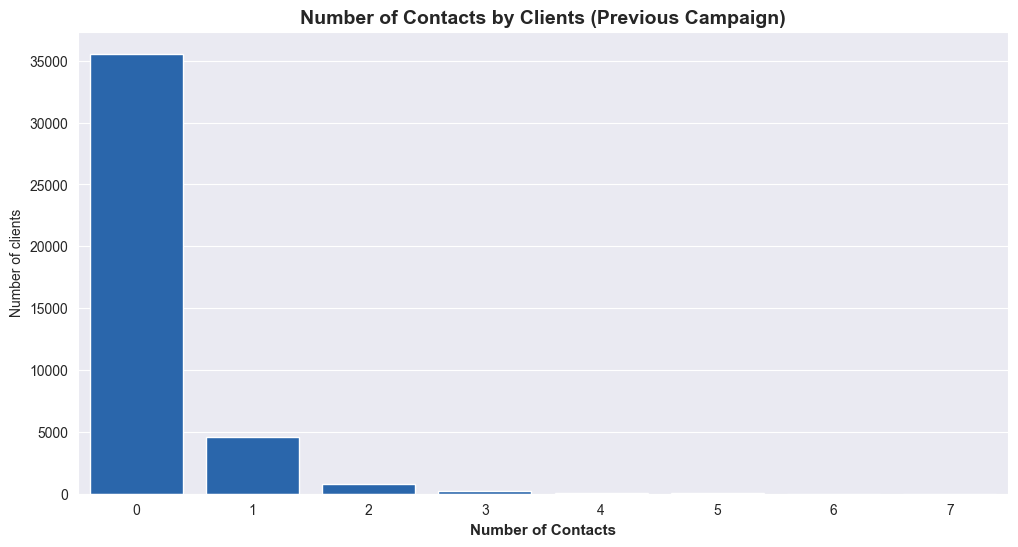

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(data=campaign_df, x='previous_campaign_contacts')
plt.title("Number of Contacts by Clients (Previous Campaign)",fontsize=14, weight="bold")
plt.xlabel("Number of Contacts", fontsize=11, weight="bold")
plt.ylabel("Number of clients")
plt.show()

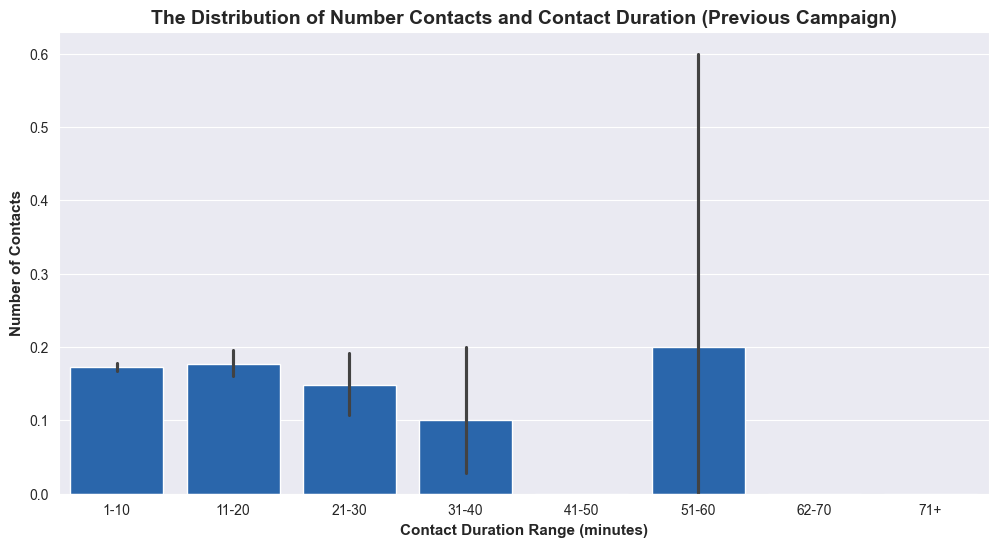

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=campaign_df, x='contact_duration_min_range', y='previous_campaign_contacts')
plt.title("The Distribution of Number Contacts and Contact Duration (Previous Campaign)", fontsize=14, weight="bold")
plt.ylabel("Number of Contacts", fontsize=11, weight="bold")
plt.xlabel("Contact Duration Range (minutes)", fontsize=11, weight="bold")
plt.show()

In [79]:
# Number of contacts vs previouscampaign outcome
contacts_prev_campaign_results = (campaign_df.groupby(['previous_campaign_contacts','previous_outcome'])\
.size().reset_index(name='count'))
contacts_prev_campaign_results

,previous_campaign_contacts,previous_outcome,count
0,0,False,35563
1,1,False,3696
2,1,True,865
3,2,False,434
4,2,True,320
5,3,False,88
6,3,True,128
7,4,False,30
8,4,True,40
9,5,False,3


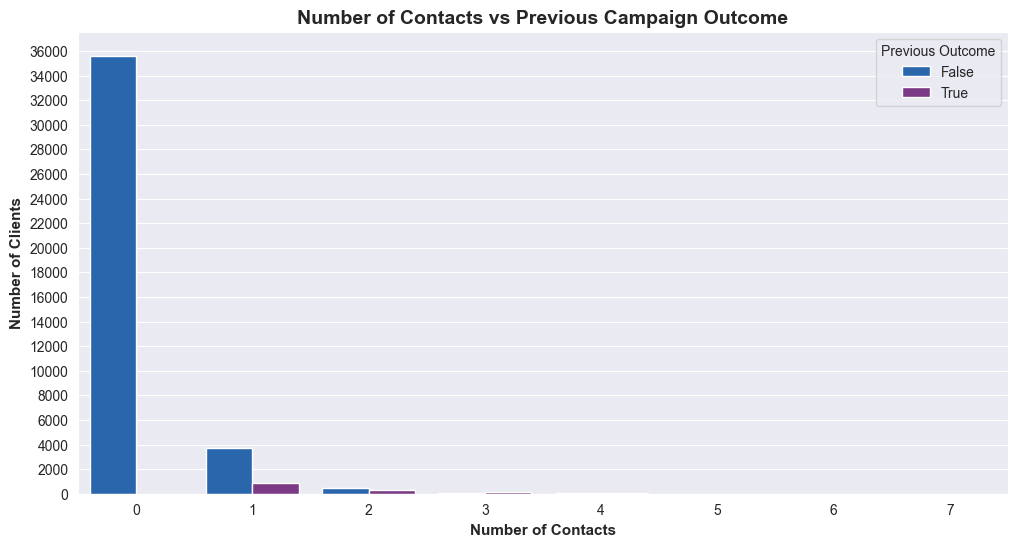

In [59]:
# Graphic number of contacts and previous campaign outcome
plt.figure(figsize=(12,6))
sns.barplot(data=contacts_prev_campaign_results, x='previous_campaign_contacts', y='count', hue='previous_outcome')
plt.title("Number of Contacts vs Previous Campaign Outcome", fontsize=14, weight="bold")
plt.xlabel("Number of Contacts", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,contacts_prev_campaign_results['count'].max()+2000)
plt.legend(title="Previous Outcome")
plt.show()

In [60]:
# Grouping contact duration and previous ampaign outcome
contact_duration_prev_campaign_results = \
(campaign_df.groupby(['contact_duration_min_range','previous_outcome'], observed=False).size().reset_index(name='count'))
contact_duration_prev_campaign_results

,contact_duration_min_range,previous_outcome,count
0,1-10,False,36502
1,1-10,True,1222
2,11-20,False,2814
3,11-20,True,137
4,21-30,False,401
5,21-30,True,11
6,31-40,False,68
7,31-40,True,2
8,41-50,False,16
9,41-50,True,0


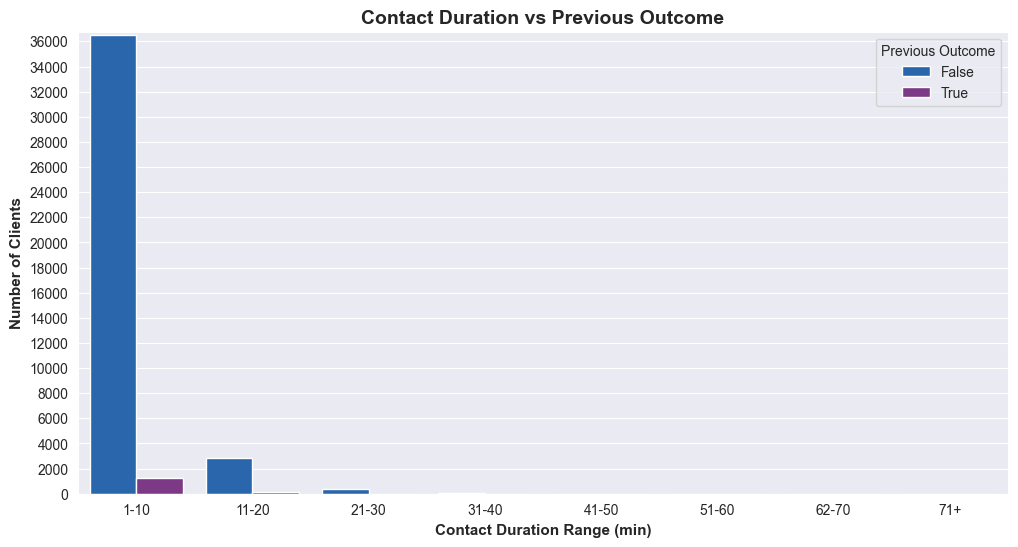

In [61]:
# Graphic contact duration and previous outcome
plt.figure(figsize=(12,6))
sns.barplot(data=contact_duration_prev_campaign_results, x='contact_duration_min_range', y='count', hue='previous_outcome')
plt.title("Contact Duration vs Previous Outcome", fontsize=14, weight="bold")
plt.xlabel("Contact Duration Range (min)", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,contact_duration_campaign_results['count'].max()+2000)
plt.legend(title="Previous Outcome")
plt.show()

In [62]:
# Proportion of results: True = Outcomes; False= No outcomes
round(campaign_df['campaign_outcome'].value_counts(normalize=True)*100,2)

campaign_outcome
False    88.73
True     11.27
Name: proportion, dtype: float64

In [63]:
# Proportion of results: True = Outcomes; False= No outcomes
round(campaign_df['previous_outcome'].value_counts(normalize=True)*100,2)

previous_outcome
False    96.67
True      3.33
Name: proportion, dtype: float64

#### Results of improvement between previous and current campaign

In [64]:
# Improving in percentaje of outcomes between previous and current campaign
current_success = round(campaign_df['campaign_outcome'].value_counts(normalize=True)[True] *100,2)
previous_success = round(campaign_df['previous_outcome'].value_counts(normalize=True)[True]*100,2)

improvement_pp = round(current_success - previous_success, 2)
improvement_rel = round((current_success - previous_success)/previous_success*100,2)
print(f"Previous outcome success rate: {previous_success}%")
print(f"Current campaign success rate: {current_success}%")
print(f"Improvement (points): {improvement_pp} pp")
print(f"Improvement (relative): {improvement_rel}%")

Previous outcome success rate: 3.33%
Current campaign success rate: 11.27%
Improvement (points): 7.94 pp
Improvement (relative): 238.44%


### Analysis of the influence of economic factors

In [65]:
min_cons_price = economics_df['cons_price_idx'].min().round(2)
max_cons_price = economics_df['cons_price_idx'].max().round(2)
mean_cons_price = economics_df['cons_price_idx'].mean().round(2)

print(f"The minimum consumer price index: {min_cons_price}")
print(f"The maximum consumer price index: {max_cons_price}")
print(f"The mean consumer price index: {mean_cons_price}")

The minimum consumer price index: 92.2
The maximum consumer price index: 94.77
The mean consumer price index: 93.58


In [66]:
min_euribor_month = economics_df['euribor_three_months'].min().round(2)
max_euribor_month = economics_df['euribor_three_months'].max().round(2)
mean_euribor_month = economics_df['euribor_three_months'].mean().round(2)

print(f"The minimum euribor three months: {min_euribor_month}")
print(f"The maximum euribor three months: {max_euribor_month}")
print(f"The mean euribor three months: {mean_euribor_month}")

The minimum euribor three months: 0.63
The maximum euribor three months: 5.04
The mean euribor three months: 3.62


In [67]:
# Correlation between consumer price index and euribor three months
correlation = economics_df['cons_price_idx'].corr(economics_df['euribor_three_months']).round(2)
print(f"The correlation is: {correlation}")

The correlation is: 0.69


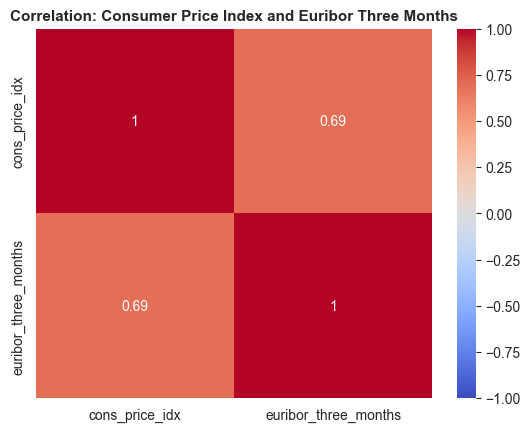

In [68]:
# Graphic of the correlation
correlation_cpi_etm = economics_df[['cons_price_idx', 'euribor_three_months']].corr()
sns.heatmap(correlation_cpi_etm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Consumer Price Index and Euribor Three Months", fontsize=11, weight="bold")
plt.show()

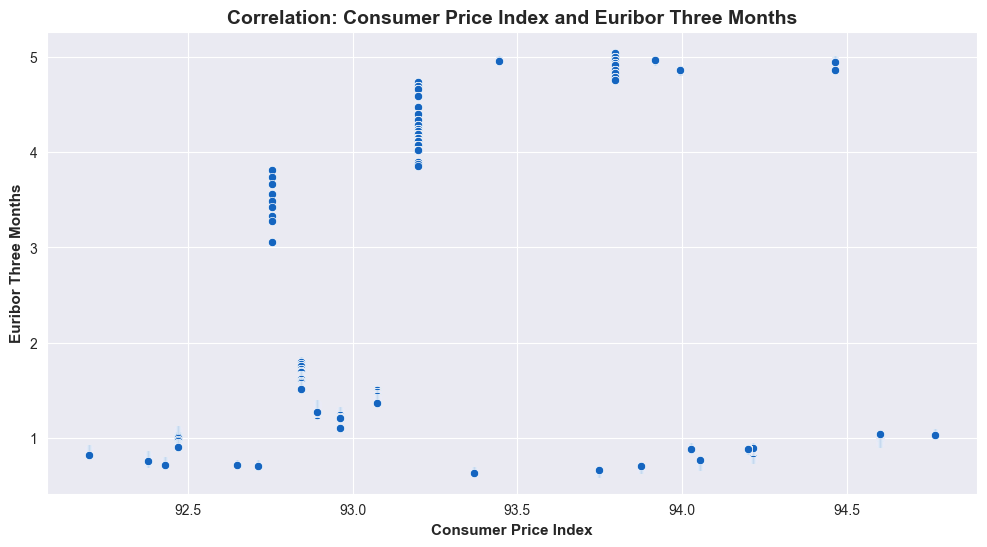

In [69]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=economics_df, x='cons_price_idx', y='euribor_three_months')
plt.title("Correlation: Consumer Price Index and Euribor Three Months", fontsize=14, weight="bold")
plt.xlabel("Consumer Price Index", fontsize=11, weight="bold")
plt.ylabel("Euribor Three Months", fontsize=11, weight="bold")
plt.show()

In [70]:
# Merging campaign and economics dataframes
economics_campaign_df = campaign_df.merge(economics_df, on='client_id')
economics_campaign_df.head(10)

,client_id,number_contacts,contact_duration,previous_campaign_contacts,previous_outcome,campaign_outcome,last_contact_date,contact_duration_min,contact_duration_min_range,cons_price_idx,euribor_three_months
0,0,1,261,0,False,False,2022-05-13,4.35,1-10,93.994,4.857
1,1,1,149,0,False,False,2022-05-19,2.48,1-10,93.994,4.857
2,2,1,226,0,False,False,2022-05-23,3.77,1-10,93.994,4.857
3,3,1,151,0,False,False,2022-05-27,2.52,1-10,93.994,4.857
4,4,1,307,0,False,False,2022-05-03,5.12,1-10,93.994,4.857
5,5,1,198,0,False,False,2022-05-05,3.30,1-10,93.994,4.857
6,6,1,139,0,False,False,2022-05-03,2.32,1-10,93.994,4.857
7,7,1,217,0,False,False,2022-05-12,3.62,1-10,93.994,4.857
8,8,1,380,0,False,False,2022-05-21,6.33,1-10,93.994,4.857
9,9,1,50,0,False,False,2022-05-05,0.83,1-10,93.994,4.857


In [81]:
# Creating euribor range column
economics_campaign_df = economics_campaign_df.copy()

ranges_euribor = [0, 2, 4, np.inf]
group_names_euribor = ['0-2', '2-4', '4+']

economics_campaign_df['euribor_range'] = pd.cut(economics_campaign_df['euribor_three_months']\
,bins=ranges_euribor, labels=group_names_euribor,right= True,include_lowest=True)

euribor_clients = economics_campaign_df.groupby(['euribor_range','campaign_outcome']\
,observed=True).size().reset_index(name='count')
euribor_clients

,euribor_range,campaign_outcome,count
0,0-2,False,10197
1,0-2,True,3301
2,2-4,False,13
3,2-4,True,1
4,4+,False,26338
5,4+,True,1338


In [72]:
euribor_success = economics_campaign_df.groupby('euribor_range', observed=True)['campaign_outcome'].mean()*100
euribor_success.round(2)

euribor_range
0-2    24.46
2-4     7.14
4+      4.83
Name: campaign_outcome, dtype: float64

In [84]:
# Creating constant price idx range column
economics_campaign_df = economics_campaign_df.copy()

ranges_price_idx = [0, 92, 94, np.inf]
group_price_idx = ['0-92', '92-94', '94+']

economics_campaign_df['const_price_range'] = pd.cut(economics_campaign_df['cons_price_idx']\
,bins=ranges_price_idx, labels=group_price_idx, right= True,include_lowest=True)

price_idx_clients = economics_campaign_df.groupby(['const_price_range','campaign_outcome']\
,observed=True).size().reset_index(name='count')
price_idx_clients

,const_price_range,campaign_outcome,count
0,92-94,False,31658
1,92-94,True,3748
2,94+,False,4890
3,94+,True,892


In [74]:
const_price_success = economics_campaign_df.groupby('const_price_range', observed=True)['campaign_outcome'].mean()*100
const_price_success.round(2)

const_price_range
92-94    10.59
94+      15.43
Name: campaign_outcome, dtype: float64

In [75]:
# Efectiveness of const_price_idx and euribor_range
# Grouping const_price_range, euribor_range and campaign_outcome
euribor_const_price = (economics_campaign_df.groupby(['const_price_range','euribor_range','campaign_outcome']\
,observed=False).size().reset_index(name='count'))

# Calculating total of each group
totals = (euribor_const_price.groupby(['const_price_range','euribor_range'], observed=True)['count'].transform('sum'))

# New column of % rate sucess
euribor_const_price['success_rate'] = round(euribor_const_price['count'] / totals *100,2)
euribor_const_price

,const_price_range,euribor_range,campaign_outcome,count,success_rate
0,0-92,0-2,False,0,NaN
1,0-92,0-2,True,0,NaN
2,0-92,2-4,False,0,NaN
3,0-92,2-4,True,0,NaN
4,0-92,4+,False,0,NaN
5,0-92,4+,True,0,NaN
6,92-94,0-2,False,9493,78.52
7,92-94,0-2,True,2597,21.48
8,92-94,2-4,False,13,92.86
9,92-94,2-4,True,1,7.14


In [76]:
# % rate sucess of customers who accepted the loan
success_only = euribor_const_price[euribor_const_price['campaign_outcome'] == True]
euribor_const_price_range = success_only.pivot_table(values='success_rate', index='const_price_range'\
,columns='euribor_range', fill_value=0, observed=True)
euribor_const_price_range

euribor_range,0-2,2-4,4+
const_price_range,,,
92-94,21.48,7.14,4.94
94+,50.00,0.00,4.30


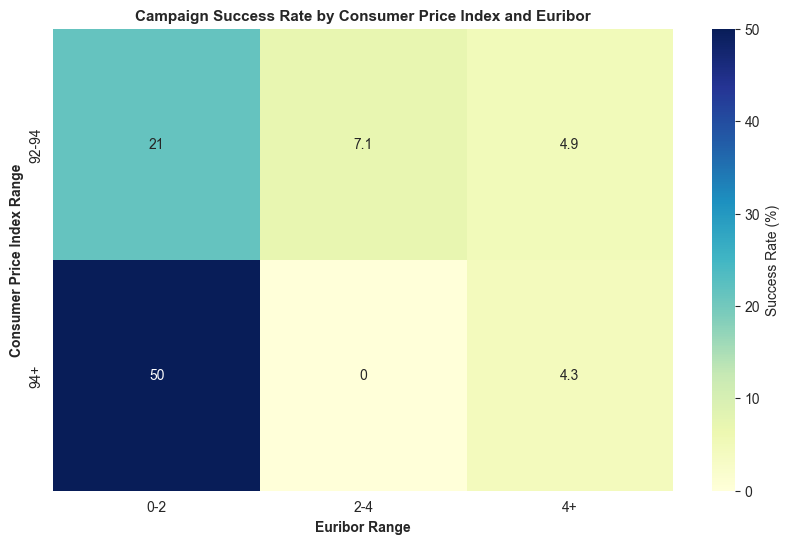

In [77]:
# Graphic of the correlation euribor, const_price and success campaign
plt.figure(figsize=(10,6))
sns.heatmap(euribor_const_price_range, annot=True, cmap='YlGnBu', cbar_kws={'label':'Success Rate (%)'})
plt.title("Campaign Success Rate by Consumer Price Index and Euribor", fontsize=11, weight="bold")
plt.xlabel("Euribor Range", fontsize=10, weight="bold")
plt.ylabel("Consumer Price Index Range", fontsize=10, weight="bold")
plt.show()